In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Problem Statement / Overview:

In this project, I will be evaluating different housing features like "bathroom quality, kitchen size, and roof styles" to optimize a model which predict house prices.  Through the qualitatively impact features the homeowners who wishes to sell their house will be able to identify which features of their house should or shouldn't be mentioned to their real estate agent to get the most value out of the pricing.

In [2]:
sample = pd.read_csv('datasets/sample_sub_reg.csv')

In [3]:
sample.head()

,Id,SalePrice
0,2,181479.1217
1,4,181479.1217
2,6,181479.1217
3,7,181479.1217
4,17,181479.1217


In [4]:
train = pd.read_csv('datasets/train.csv')

In [5]:
test = pd.read_csv('datasets/test.csv')

In [6]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [7]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


# Data Cleaning

In [8]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [9]:
train.drop(columns=['Id','PID'], inplace=True)

test.drop(columns=['PID'], inplace=True)

In [10]:
train.isnull().sum()[:40]

MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
dtype: int64

In [11]:
train.dtypes[:40]

MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
Foundation         object
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Heating     

### Null Values (First 40 Col)
1. Lot Frontage = change to 0
2. Alley = change to None (note: None = 0, Grvl = 1, Pave = 2)
3. Mas Vnr Type = change to 'None'
4. Mas Vnr Area = change to 0
5. Bsmt Qual = change to 'None'
6. Bsmt Cond = change to 'None'
7. Bsmt Exposure = change to 'None'
8. BsmtFin Type 1 = change to 'None'
9. BsmtFin SF 1 = change to 0
10. BsmtFin Type 2 = change to 'None'
11. BsmtFin SF 2 = change to 0
12. Bsmt Unf SF = change to 0
13. Total Bsmt SF = change to 0

#### Note: Feature Engineering: 
1. Create a Bsmt col (1 if basement is presence; otherwise 0)
2. Create an age col (Year Built - Yr Sold)

### Cleaning First 40 Col

In [12]:
train['Lot Frontage'].fillna(0, inplace=True) #Num
train['Alley'].fillna('None', inplace=True) #Cat
train['Mas Vnr Type'].fillna('None', inplace=True) #Cat
train['Mas Vnr Area'].fillna(0 , inplace=True) #Cat
train['Bsmt Qual'].fillna('None', inplace=True) #Cat
train['Bsmt Cond'].fillna('None', inplace=True) #Cat
train['Bsmt Exposure'].fillna('None', inplace=True) #Cat
train['BsmtFin Type 1'].fillna('None', inplace=True) #Cat
train['BsmtFin SF 1'].fillna(0, inplace=True) #Num
train['BsmtFin Type 2'].fillna('None', inplace=True) #Cat
train['BsmtFin SF 2'].fillna(0, inplace=True) #Num
train['Bsmt Unf SF'].fillna(0, inplace=True) #Num
train['Total Bsmt SF'].fillna(0, inplace=True) #Num

test['Lot Frontage'].fillna(0, inplace=True) #Num
test['Alley'].fillna('None', inplace=True) #Cat
test['Mas Vnr Type'].fillna('None', inplace=True) #Cat
test['Mas Vnr Area'].fillna(0 , inplace=True) #Cat
test['Bsmt Qual'].fillna('None', inplace=True) #Cat
test['Bsmt Cond'].fillna('None', inplace=True) #Cat
test['Bsmt Exposure'].fillna('None', inplace=True) #Cat
test['BsmtFin Type 1'].fillna('None', inplace=True) #Cat
test['BsmtFin SF 1'].fillna(0, inplace=True) #Num
test['BsmtFin Type 2'].fillna('None', inplace=True) #Cat
test['BsmtFin SF 2'].fillna(0, inplace=True) #Num
test['Bsmt Unf SF'].fillna(0, inplace=True) #Num
test['Total Bsmt SF'].fillna(0, inplace=True) #Num

---

In [13]:
train.isnull().sum()[40:]

Central Air           0
Electrical            0
1st Flr SF            0
2nd Flr SF            0
Low Qual Fin SF       0
Gr Liv Area           0
Bsmt Full Bath        2
Bsmt Half Bath        2
Full Bath             0
Half Bath             0
Bedroom AbvGr         0
Kitchen AbvGr         0
Kitchen Qual          0
TotRms AbvGrd         0
Functional            0
Fireplaces            0
Fireplace Qu       1000
Garage Type         113
Garage Yr Blt       114
Garage Finish       114
Garage Cars           1
Garage Area           1
Garage Qual         114
Garage Cond         114
Paved Drive           0
Wood Deck SF          0
Open Porch SF         0
Enclosed Porch        0
3Ssn Porch            0
Screen Porch          0
Pool Area             0
Pool QC            2042
Fence              1651
Misc Feature       1986
Misc Val              0
Mo Sold               0
Yr Sold               0
Sale Type             0
SalePrice             0
dtype: int64

In [14]:
train.dtypes[40:]

Central Air         object
Electrical          object
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
Kitchen Qual        object
TotRms AbvGrd        int64
Functional          object
Fireplaces           int64
Fireplace Qu        object
Garage Type         object
Garage Yr Blt      float64
Garage Finish       object
Garage Cars        float64
Garage Area        float64
Garage Qual         object
Garage Cond         object
Paved Drive         object
Wood Deck SF         int64
Open Porch SF        int64
Enclosed Porch       int64
3Ssn Porch           int64
Screen Porch         int64
Pool Area            int64
Pool QC             object
Fence               object
Misc Feature        object
Misc Val             int64
Mo Sold              int64
Yr Sold              int64
S

### Null Values (Remaining Col)
1. Bsmt Full Bath = change to 0 
2. Bsmt Half Bath = change to 0 
3. Fireplace Qu = change to 'None'
4. Garage Type = change to 'None'
5. Garage Yr Blt = drop col due to un usable null
6. Garage Finish = change to 'None'
7. Garage Cars = change to 0
8. Garage Area = change to 0
9. Garage Qual = change to 'None'
10. Garage Cond = change to 'None'
11. Pool QC = change to 'None'
12. Fence = change to 'None'
13. Misc Feature = change to 'None'

#### Feature Engineering:
1. Create a Garage col = 1 if there is a garage and 0 if there is none

### Cleaning Remaining Col

In [15]:
train['Bsmt Full Bath'].fillna(0, inplace=True) #Num
train['Bsmt Half Bath'].fillna(0, inplace=True) #Num
train['Fireplace Qu'].fillna('None', inplace=True) #Cat
train['Garage Type'].fillna('None', inplace=True) #Cat
train.drop(columns='Garage Yr Blt', inplace=True)
train['Garage Finish'].fillna('None', inplace=True) #Cat
train['Garage Cars'].fillna(train['Garage Cars'].mode()[0], inplace=True) #Num
train['Garage Area'].fillna(test['Garage Area'].mean(), inplace=True) #Num
train['Garage Qual'].fillna('None', inplace=True) #Cat
train['Garage Cond'].fillna('None', inplace=True) #Cat
train['Pool QC'].fillna('None', inplace=True) #Cat
train['Fence'].fillna('None', inplace=True) #Cat
train['Misc Feature'].fillna('None', inplace=True) #Cat

test['Bsmt Full Bath'].fillna(0, inplace=True) #Num
test['Bsmt Half Bath'].fillna(0, inplace=True) #Num
test['Fireplace Qu'].fillna('None', inplace=True) #Cat
test['Garage Type'].fillna('None', inplace=True) #Cat
test.drop(columns='Garage Yr Blt', inplace=True)
test['Garage Finish'].fillna('None', inplace=True) #Cat
test['Garage Cars'].fillna(test['Garage Cars'].mode()[0], inplace=True) #Num
test['Garage Area'].fillna(test['Garage Area'].mean(), inplace=True) #Num
test['Garage Qual'].fillna('None', inplace=True) #Cat
test['Garage Cond'].fillna('None', inplace=True) #Cat
test['Pool QC'].fillna('None', inplace=True) #Cat
test['Fence'].fillna('None', inplace=True) #Cat
test['Misc Feature'].fillna('None', inplace=True) #Cat

---

## Feature Engineering

In [16]:
train['Garage'] = train['Garage Cond'].apply(lambda x: 0 if x == 'None' else 1)

test['Garage'] = test['Garage Cond'].apply(lambda x: 0 if x == 'None' else 1)

Added Age column (Age of house when it was sold)

In [17]:
train['Bsmt'] = train['Bsmt Qual'].apply(lambda x: 0 if x == 'None' else 1)
train['Age'] = train['Yr Sold'] - train['Year Built']

test['Bsmt'] = test['Bsmt Qual'].apply(lambda x: 0 if x == 'None' else 1)
test['Age'] = test['Yr Sold'] - test['Year Built']

In [18]:
train['Street'].value_counts()

Pave    2044
Grvl       7
Name: Street, dtype: int64

In [19]:
train['Street'] = train['Street'].map({'Pave':1,'Grvl':0})

test['Street'] = test['Street'].map({'Pave':1,'Grvl':0})

In [20]:
train['Alley'].value_counts()

None    1911
Grvl      85
Pave      55
Name: Alley, dtype: int64

In [21]:
train = pd.get_dummies(train ,columns=['Alley'])
test = pd.get_dummies(test ,columns=['Alley'])

---

## Import Modeling Libraries

In [22]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

### See Correlation (Choosing features)

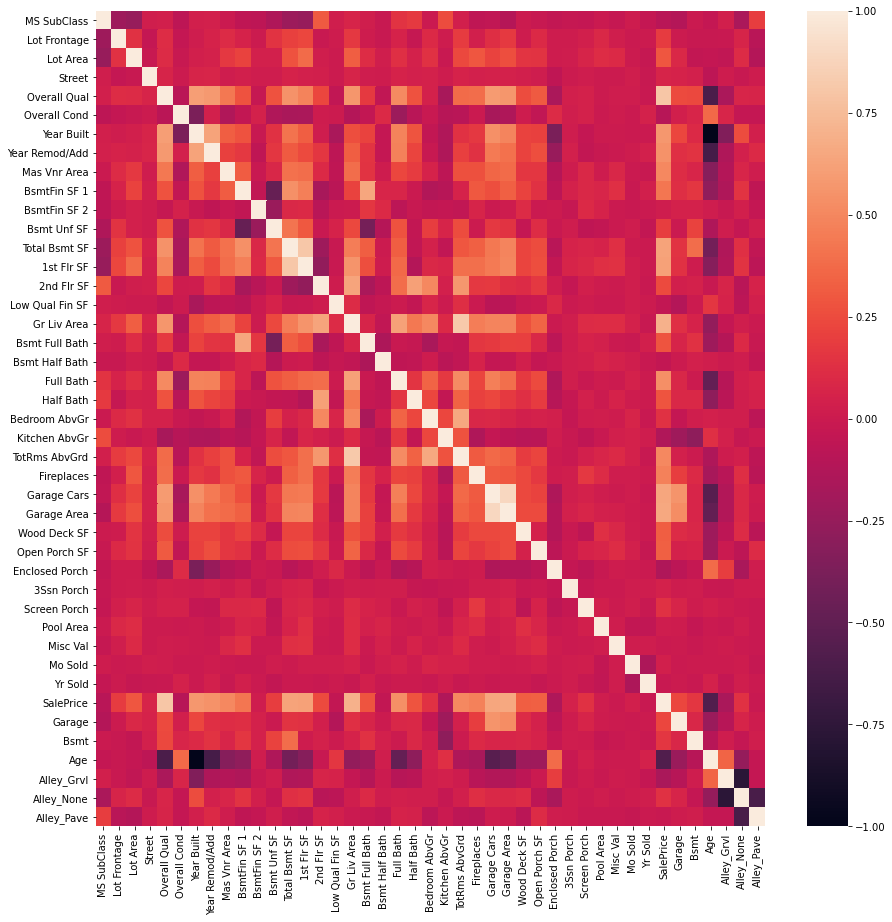

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), vmin= -1);

In [24]:
train.corr()['SalePrice'].sort_values()

Age               -0.571881
Alley_Grvl        -0.159109
Enclosed Porch    -0.135656
Kitchen AbvGr     -0.125444
Overall Cond      -0.097019
MS SubClass       -0.087335
Bsmt Half Bath    -0.045290
Low Qual Fin SF   -0.041594
Yr Sold           -0.015203
Alley_Pave        -0.014528
Misc Val          -0.007375
BsmtFin SF 2       0.016432
Pool Area          0.023106
Mo Sold            0.032735
3Ssn Porch         0.048732
Street             0.069841
Screen Porch       0.134581
Alley_None         0.135054
Bedroom AbvGr      0.137067
Bsmt               0.157385
Lot Frontage       0.181456
Bsmt Unf SF        0.190861
Garage             0.230855
2nd Flr SF         0.248452
Half Bath          0.283001
Bsmt Full Bath     0.283332
Lot Area           0.296566
Wood Deck SF       0.326490
Open Porch SF      0.333476
BsmtFin SF 1       0.423856
Fireplaces         0.471093
Mas Vnr Area       0.503579
TotRms AbvGrd      0.504014
Full Bath          0.537969
Year Remod/Add     0.550370
Year Built         0

### High Corr Features:
Age, Overall Qual, Gr Liv Area, Garage Area, Garage Cars, Total Bsmt SF, 1st Flr SF, Year Built, Year Remod/Add, Full Bath, TotRms AbvGrd, Fireplaces, BsmtFin SF 1, Open Porch SF

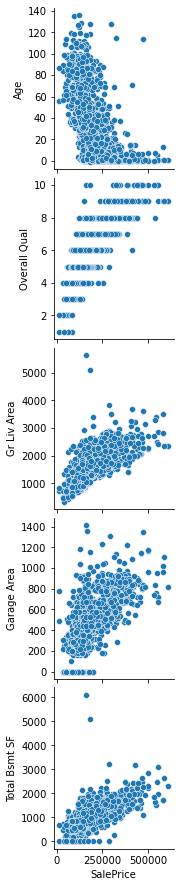

In [25]:
sns.pairplot(train, x_vars=['SalePrice'], y_vars=['Age','Overall Qual','Gr Liv Area','Garage Area','Total Bsmt SF'],diag_kind=None);

## Creating new function with reusability

### How it works
1. return the prediction from the best model
2. require the features (a list) as the parameter
3. the Function should get the ideal alpha and l1 ratio for elastic models
4. the Function should get the ideal alpha for the ridge models

In [26]:
def model(features):
    X_temp = train[features]
    testing_temp = test[features]
    ss = StandardScaler()
    ss.fit(X_temp)
    X_scaled_temp = ss.transform(X_temp)
    testing_scale_temp = ss.transform(testing_temp)
    y = train['SalePrice']
    
    lr = LinearRegression()
    
    ridge_cv = RidgeCV(alphas = np.linspace(0.1,10,100))
    ridge_cv.fit(X_scaled_temp,  y)
    ridge = Ridge(alpha=(ridge_cv.alpha_))
    
    el_cv = ElasticNetCV(n_alphas=100, l1_ratio= [.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
    el_cv.fit(X_scaled_temp, y)
    el = ElasticNet(alpha=(el_cv.alpha_), l1_ratio=(el_cv.l1_ratio_))
    
    lr_r2 = cross_val_score(lr, X_scaled_temp, y, cv=5).mean()
    lr_rmse = np.abs(cross_val_score(lr, X_scaled_temp, y, cv=5, scoring='neg_root_mean_squared_error')).mean()
    ridge_r2 = cross_val_score(ridge,X_scaled_temp,y,cv=5).mean()
    ridge_rmse = np.abs(cross_val_score(ridge, X_scaled_temp, y, cv=5, scoring='neg_root_mean_squared_error')).mean()
    el_r2 = cross_val_score(el,X_scaled_temp,y,cv=5).mean()
    el_rmse = np.abs(cross_val_score(el, X_scaled_temp, y, cv=5, scoring='neg_root_mean_squared_error')).mean()
    
    print('lr, R2:', lr_r2)
    print('lr, RMSE:', lr_rmse)
    print('Ridge, R2:', ridge_r2)
    print('Ridge, RMSE:', ridge_rmse)
    print('Elastic, R2:', el_r2)
    print('Elastic, RMSE', el_rmse)
    
    if lr_r2 > ridge_r2 and lr_r2 > el_r2:
        lr.fit(X_scaled_temp, y)
        prediction = lr.predict(testing_scale_temp)
    elif ridge_r2 > lr_r2 and ridge_r2 > el_r2:
        ridge.fit(X_scaled_temp, y)
        prediction = ridge.predict(testing_scale_temp)
    else:
        el.fit(X_scaled_temp, y)
        prediction = el.predict(testing_scale_temp)
    
    return prediction

---

## Model 1 (High Corr Model)
1. Underfit

In [27]:
features_1 = ['Age', 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 
          'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 
          'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Open Porch SF']

In [28]:
prediction_1 = model(features_1)

lr, R2: 0.795996569931045
lr, RMSE: 35534.33849961775
Ridge, R2: 0.7962768114862228
Ridge, RMSE: 35516.533161885956
Elastic, R2: 0.7976398422864213
Elastic, RMSE 35431.38788830128


In [29]:
df_ver1 = pd.DataFrame(data = {'Id': test['Id'], 'SalePrice': prediction_1})

In [30]:
df_ver1.head()

,Id,SalePrice
0,2658,153709.304568
1,2718,190558.105148
2,2414,207651.910108
3,1989,120790.290513
4,625,188769.374886


In [31]:
df_ver1.to_csv('solution_ver_01.csv', index=False)

---

## Model 2 (Model 1 + additional feature engineering)
1. Slight increase in performance
2. The mode is still extremely underfitting
3. MS Zoning Negatively impact linear Regression models

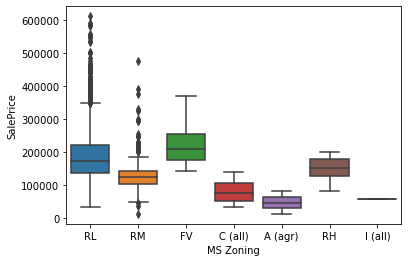

In [32]:
# More EDA/Feature Engineering 
sns.boxplot(x='MS Zoning',y='SalePrice',data=train);

In [33]:
train['MS Zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

In [34]:
test['MS Zoning'].value_counts()

RL         675
RM         146
FV          38
RH          13
C (all)      6
I (all)      1
Name: MS Zoning, dtype: int64

### Feature Engineering:

In [35]:
train = pd.get_dummies(train ,columns=['MS Zoning'])
test = pd.get_dummies(test ,columns=['MS Zoning'])

In [36]:
test['MS Zoning_A (agr)'] = 0

In [37]:
train.columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Street', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage

## Creating Model 2

In [38]:
features_2 = ['Age', 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 
          'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 
          'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Open Porch SF', 'MS Zoning_A (agr)', 'MS Zoning_C (all)',
           'MS Zoning_FV', 'MS Zoning_I (all)', 'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM']

In [39]:
prediction_2 = model(features_2)

lr, R2: -3.250985971050719e+22
lr, RMSE: 6222226724891172.0
Ridge, R2: 0.7972165768786701
Ridge, RMSE: 35423.943644176616
Elastic, R2: 0.7986346813217278
Elastic, RMSE 35335.13750275824


In [40]:
df_ver2 = pd.DataFrame(data = {'Id': test['Id'], 'SalePrice': prediction_2})
df_ver2.head()

,Id,SalePrice
0,2658,149890.300805
1,2718,189861.111113
2,2414,208295.348185
3,1989,116596.842383
4,625,189090.424630


In [41]:
df_ver2.to_csv('solution_ver_02.csv', index=False)

---

## Model 3 (Use large amount of features with expectation of an overfitting model)
1. To my surprise, all the model performed decent, additionally the model does not seem to be overfitting

In [42]:
features_3 = ['Age', 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 
          'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 
          'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Open Porch SF', 'MS Zoning_A (agr)', 'MS Zoning_C (all)',
           'MS Zoning_FV', 'MS Zoning_I (all)', 'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM','Bsmt','Wood Deck SF',
           'Lot Area', 'Bsmt Full Bath', 'Half Bath','2nd Flr SF']

In [43]:
prediction_3 = model(features_3)

lr, R2: 0.7985884026345806
lr, RMSE: 35287.488174939215
Ridge, R2: 0.7992843767860597
Ridge, RMSE: 35228.14360402398
Elastic, R2: 0.8015831880781636
Elastic, RMSE 35068.67784394823


In [44]:
df_ver3 = pd.DataFrame(data = {'Id': test['Id'], 'SalePrice': prediction_3})
df_ver3.head()

,Id,SalePrice
0,2658,150919.563217
1,2718,188444.385304
2,2414,216673.132914
3,1989,115637.468314
4,625,189019.768544


In [45]:
df_ver3.to_csv('solution_ver_03.csv', index=False)

# Model 4 (Reusing model 3 with cleaner data)
1. Minor improvement to the model

### Continue to clean data/feature engineering:

Using .mean() to fill up null values in Lot Frontage column instead of 0

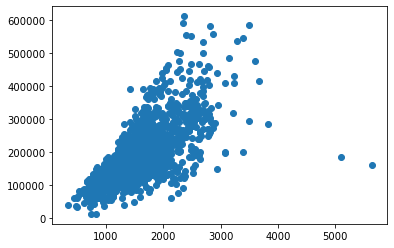

In [46]:
plt.scatter(train['Gr Liv Area'], train['SalePrice']);

Getting rid of row 1885 and 960 as they are extreme outliers and row has 1885 has negative age, which means there are some kind of error within the data sample 

In [47]:
train[train['Gr Liv Area']>4000]

,MS SubClass,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Alley_Grvl,Alley_None,Alley_Pave,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM
960,60,313.0,63887,1,IR3,Bnk,AllPub,Corner,Gtl,Edwards,...,0,1,0,0,0,0,0,0,1,0
1885,20,128.0,39290,1,IR1,Bnk,AllPub,Inside,Gtl,Edwards,...,0,1,0,0,0,0,0,0,1,0


In [48]:
train[train['Age']<=-1]

,MS SubClass,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Alley_Grvl,Alley_None,Alley_Pave,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM
1885,20,128.0,39290,1,IR1,Bnk,AllPub,Inside,Gtl,Edwards,...,0,1,0,0,0,0,0,0,1,0


In [49]:
train[train['Year Built']==train['Yr Sold']].shape

(80, 89)

In [50]:
train.drop([1885,960], inplace=True)

## Creating model 4 based on model 3 features

In [51]:
features_4 = features_3

In [52]:
prediction_4 = model(features_4)

lr, R2: 0.8545984116788274
lr, RMSE: 30179.801826155803
Ridge, R2: 0.8551588885277546
Ridge, RMSE: 30124.314094508787
Elastic, R2: 0.8552904291685319
Elastic, RMSE 30111.305933243268


In [53]:
df_ver4 = pd.DataFrame(data = {'Id': test['Id'], 'SalePrice': prediction_4})
df_ver4.head()

,Id,SalePrice
0,2658,155152.235127
1,2718,199630.440080
2,2414,206767.414606
3,1989,112735.599103
4,625,190303.859519


In [54]:
df_ver4.to_csv('solution_ver_04.csv', index=False)

---

# Model 5 
1. (Best model so far)
2. Using an overfitting features (all avalible numeric features after the data has been cleaned to a certain stage) and Elastic model to regularize
3. Kaggel RMSE: 28811.64067

In [55]:
features_5 = [col for col in train._get_numeric_data().columns if col != 'SalePrice']
prediction_5 = model(features_5)

lr, R2: -4.66033626647772e+22
lr, RMSE: 7471977203344720.0
Ridge, R2: 0.8723558971451787
Ridge, RMSE: 28259.707780824403
Elastic, R2: 0.8731422622393925
Elastic, RMSE 28170.212899249756


In [56]:
df_ver5 = pd.DataFrame(data = {'Id': test['Id'], 'SalePrice': prediction_5})
df_ver5.head()

,Id,SalePrice
0,2658,137308.065647
1,2718,152907.554844
2,2414,204021.016463
3,1989,112533.266916
4,625,189384.876013


In [57]:
df_ver5.to_csv('solution_ver_05.csv', index=False)

---

## Continuation of feature engineering (For Model 6)

In [58]:
train['Mas Vnr Area'] = train['Mas Vnr Area'].apply(lambda x: float(x))
test['Mas Vnr Area'] = test['Mas Vnr Area'].apply(lambda x: float(x))

In [59]:
len(features_5)

49

In [60]:
len(train.columns)

89

In [61]:
cat_features = [col for col in train.columns if (col not in features_5) & (col != 'SalePrice' )]
len(cat_features)

39

In [62]:
train = pd.get_dummies(train ,columns=cat_features)
test = pd.get_dummies(test ,columns=cat_features)

In [63]:
train.shape

(2049, 303)

In [64]:
test.shape

(879, 288)

Making sure train and test have the same columns

In [65]:
train_col_to_remove = [col for col in train.columns if (col not in test.columns) & (col != 'SalePrice' )]
len(train_col_to_remove)

24

In [66]:
test_col_to_remove = [col for col in test.columns if (col not in train.columns) & (col != 'Id' )]
len(test_col_to_remove)

9

In [67]:
train.drop(columns=train_col_to_remove, inplace=True)

In [68]:
test.drop(columns=test_col_to_remove, inplace=True)

In [69]:
train.dtypes.value_counts()

uint8      239
int64       30
float64     10
dtype: int64

In [70]:
train.columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Street', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1',
       ...
       'Misc Feature_Shed', 'Sale Type_COD', 'Sale Type_CWD', 'Sale Type_Con',
       'Sale Type_ConLD', 'Sale Type_ConLI', 'Sale Type_ConLw',
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_WD '],
      dtype='object', length=279)

In [71]:
features_6 = [col for col in train.columns if col != 'SalePrice']
prediction_6 = model(features_6)

lr, R2: -1.557735075156861e+25
lr, RMSE: 2.7038314215518778e+17
Ridge, R2: 0.9154209616580623
Ridge, RMSE: 22988.394082228897
Elastic, R2: 0.9192967634490878
Elastic, RMSE 22484.192654705796


In [72]:
df_ver6 = pd.DataFrame(data = {'Id': test['Id'], 'SalePrice': prediction_6})
df_ver6.head()

,Id,SalePrice
0,2658,139508.971259
1,2718,158388.783198
2,2414,211043.648859
3,1989,109709.489724
4,625,177130.136916


In [73]:
df_ver6.to_csv('solution_ver_06.csv', index=False)

## Futher EDA/Cleaning (Scatterploting Numerical, Non-catagorical features)

In [74]:
def show_outlier(col):
    print(train[train[col] > (train[col].mean() + (3*np.std(train[col])))][col].sort_values(ascending=False)[:5])

In [75]:
show_outlier('Lot Frontage')

1335    313.0
1875    200.0
441     195.0
1263    174.0
1224    160.0
Name: Lot Frontage, dtype: float64


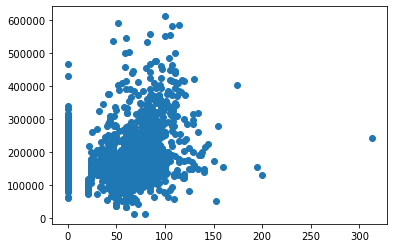

In [76]:
plt.scatter(train['Lot Frontage'], train['SalePrice']);

In [77]:
train.drop(1335, inplace=True)

In [78]:
show_outlier('Lot Area')

471     159000
694     115149
1854     70761
745      57200
823      53504
Name: Lot Area, dtype: int64


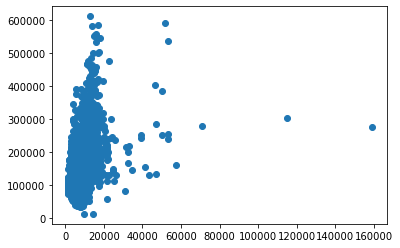

In [79]:
plt.scatter(train['Lot Area'], train['SalePrice']);

In [80]:
train.drop([471, 694], inplace=True)

Engineering a (Remodeled) column (is 1 if the house has been remodeled)

In [81]:
train['Remodeled'] = train['Year Remod/Add'] - train['Year Built']
train['Remodeled'] = train['Remodeled'].apply(lambda x: 1 if x > 0 else 0)

test['Remodeled'] = test['Year Remod/Add'] - test['Year Built']
test['Remodeled'] = test['Remodeled'].apply(lambda x: 1 if x > 0 else 0)

In [82]:
show_outlier('Mas Vnr Area')

1409    1600.0
1151    1129.0
378     1115.0
489     1110.0
1227    1095.0
Name: Mas Vnr Area, dtype: float64


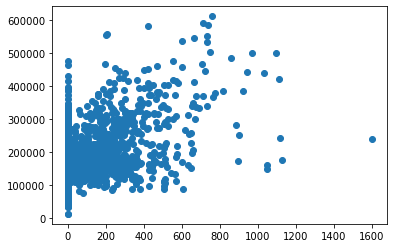

In [83]:
plt.scatter(train['Mas Vnr Area'], train['SalePrice']);

In [84]:
train.drop(1600, inplace=True)

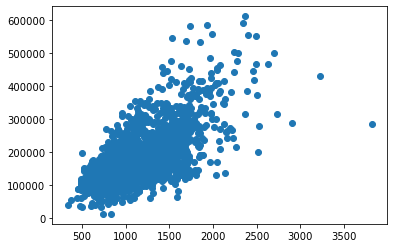

In [85]:
plt.scatter(train['1st Flr SF'], train['SalePrice']);

In [86]:
train[['1st Flr SF']].sort_values('1st Flr SF').head()

,1st Flr SF
1428,334
700,372
432,438
217,448
252,453


In [87]:
train[['2nd Flr SF']].sort_values('2nd Flr SF').head()

,2nd Flr SF
1025,0
1008,0
1007,0
1790,0
1005,0


In [88]:
train['Has_2nd_Flr'] = train['2nd Flr SF'].apply(lambda x: 1 if x > 0 else 0)
test['Has_2nd_Flr'] = test['2nd Flr SF'].apply(lambda x: 1 if x > 0 else 0)

In [89]:
train['Total_Interior'] = train['1st Flr SF'] + train['2nd Flr SF']
test['Total_Interior'] = test['1st Flr SF'] + test['2nd Flr SF']

In [90]:
show_outlier('Wood Deck SF')

966     1424
1692     870
1571     857
40       736
1131     728
Name: Wood Deck SF, dtype: int64


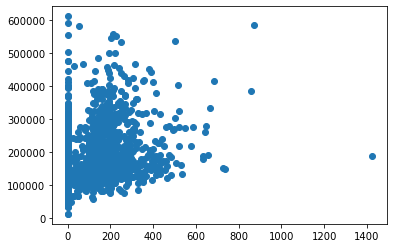

In [91]:
plt.scatter(train['Wood Deck SF'], train['SalePrice']);

In [92]:
train.drop(966, inplace=True)

In [93]:
show_outlier('Open Porch SF')

974     547
1309    523
1141    502
610     444
1174    418
Name: Open Porch SF, dtype: int64


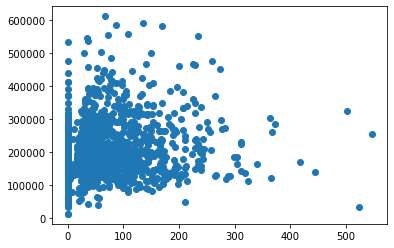

In [94]:
plt.scatter(train['Open Porch SF'], train['SalePrice']);

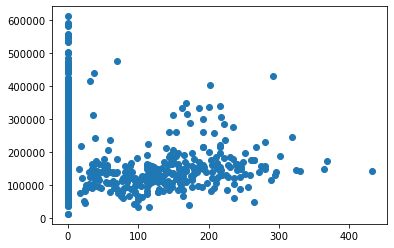

In [95]:
plt.scatter(train['Enclosed Porch'], train['SalePrice']);

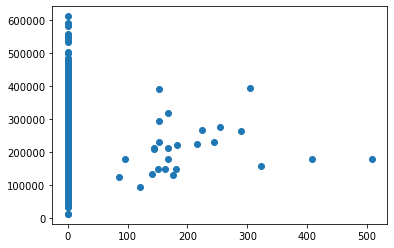

In [96]:
plt.scatter(train['3Ssn Porch'], train['SalePrice']);

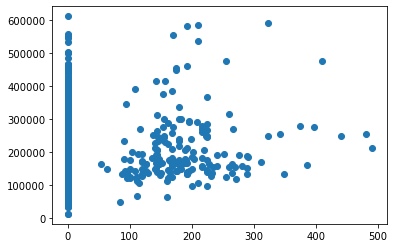

In [97]:
plt.scatter(train['Screen Porch'], train['SalePrice']);

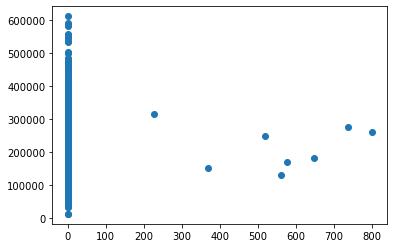

In [98]:
plt.scatter(train['Pool Area'], train['SalePrice']);

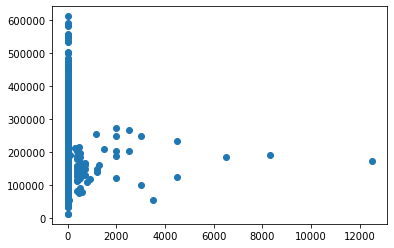

In [99]:
plt.scatter(train['Misc Val'], train['SalePrice']);

In [100]:
show_outlier('Misc Val')

304     12500
765      8300
1225     6500
1786     4500
380      4500
Name: Misc Val, dtype: int64


In [101]:
#train.drop([304, 765], inplace=True)

##  Model 7

In [102]:
features_7 = [col for col in train.columns if col != 'SalePrice']
prediction_7 = model(features_7)

lr, R2: -3.6541974706873273e+25
lr, RMSE: 3.433329484977868e+17
Ridge, R2: 0.9161922679772585
Ridge, RMSE: 22881.395015709608
Elastic, R2: 0.9209113846992738
Elastic, RMSE 22262.26368830648


In [103]:
df_ver7 = pd.DataFrame(data = {'Id': test['Id'], 'SalePrice': prediction_7})
df_ver7.head()

,Id,SalePrice
0,2658,140730.397381
1,2718,159020.226416
2,2414,213289.541843
3,1989,109940.647553
4,625,175861.464214


In [104]:
df_ver7.to_csv('solution_ver_07.csv', index=False)

## Feature Importance

In [137]:
def show_coef(features):
    X = train[features]
    ss = StandardScaler()
    ss.fit(X)
    X_scaled = ss.transform(X)
    y = train['SalePrice']

    el_cv = ElasticNetCV(n_alphas=100, l1_ratio= [.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
    el_cv.fit(X_scaled, y)
    el = ElasticNet(alpha=(el_cv.alpha_), l1_ratio=(el_cv.l1_ratio_))

    el.fit(X_scaled, y)
    sorted_coef = np.sort(np.abs(el.coef_))[::-1]

    temp=0
    count=0
    for num in sorted_coef:
        if num > 0:
             temp+=1
        count+=1  
    print(count - temp)
    print(count)
    print(1- (temp/count))
    print('Intercept:',el.intercept_)
    
    predictor_df = pd.DataFrame(data={'Coef':np.abs(el.coef_), 'Col': train[features].columns})
    return predictor_df.sort_values(by='Coef',ascending=False)

In [106]:
pred_df_7 = show_coef(features_7)

143
281
0.5088967971530249


In [107]:
pred_df_7.head(25)

,Coef,Col
16,13368.408278,Gr Liv Area
280,11196.767421,Total_Interior
4,10386.963415,Overall Qual
12,8869.631222,Total Bsmt SF
38,8520.315463,Age
9,7400.438074,BsmtFin SF 1
216,5819.652766,Kitchen Qual_Ex
2,5280.480845,Lot Area
159,5249.329225,Exter Qual_Ex
5,5235.039357,Overall Cond


In [108]:
train.dtypes.value_counts()

uint8      239
int64       33
float64     10
dtype: int64

1. 281 features (dummies features included)
2. 143 is being used
3. The remaining is being zeroed out

## Model 8 (High Coef features based on Elastic)
1. Ridge perform best in this case
2. Perform well when using CV to test on its own data
3. Perform worse on unseen data (Kaggel)

In [109]:
features_8 = ['Gr Liv Area',
'Total_Interior','Overall Qual',
'Total Bsmt SF','Age',
'BsmtFin SF 1','Kitchen Qual_Ex',
'Lot Area','Exter Qual_Ex',
'Overall Cond','Bsmt Qual_Ex',
'Neighborhood_StoneBr','Bldg Type_1Fam',
'Neighborhood_NridgHt','Garage Area',
'Neighborhood_NoRidge','Mas Vnr Area',    
'Bsmt Exposure_Gd','Sale Type_New',
'Exterior 1st_BrkFace','Screen Porch',
'Neighborhood_Somerst','Functional_Typ',
'Exter Qual_TA','Year Remod/Add']

In [110]:
prediction_8 = model(features_8)

lr, R2: 0.9176197131882102
lr, RMSE: 22722.26333847621
Ridge, R2: 0.9177286572854234
Ridge, RMSE: 22707.040845536092
Elastic, R2: 0.9176052792938991
Elastic, RMSE 22724.366150188656


In [111]:
df_ver8 = pd.DataFrame(data = {'Id': test['Id'], 'SalePrice': prediction_8})
df_ver8.to_csv('solution_ver_08.csv', index=False)

In [112]:
pred_df_8 = show_coef(features_8)
pred_df_8.head()

0
25
0.0


,Coef,Col
0,16421.013881,Gr Liv Area
2,12258.659819,Overall Qual
4,10470.932670,Age
5,9003.753759,BsmtFin SF 1
1,8317.197795,Total_Interior


# Model 9 and 10 
1. (Seeing if removing certain features will cause Impacts to the model)

---

In [113]:
features_9 = [col for col in train.columns if (col != 'SalePrice') & ('Porch' not in col)]
prediction_9 = model(features_9)

lr, R2: -8.305013472370513e+24
lr, RMSE: 1.9349153749132653e+17
Ridge, R2: 0.9141574021083347
Ridge, RMSE: 23165.66989105079
Elastic, R2: 0.9190101729645296
Elastic, RMSE 22534.25016492217


In [114]:
pred_df_9 = show_coef(features_9)

150
277
0.5415162454873645


In [115]:
df_ver9 = pd.DataFrame(data = {'Id': test['Id'], 'SalePrice': prediction_9})
df_ver9.to_csv('solution_ver_09.csv', index=False)

---

In [116]:
features_10 = [col for col in train.columns if (col != 'SalePrice') & ('Porch' not in col) & 
              ('Year' not in col) & ('Yr' not in col) ]
prediction_10 = model(features_10)

lr, R2: -1.7017007325479558e+25
lr, RMSE: 2.5677006043065325e+17
Ridge, R2: 0.9141746037230496
Ridge, RMSE: 23162.542885489434
Elastic, R2: 0.9189603365527311
Elastic, RMSE 22542.360513613618


In [117]:
df_ver10 = pd.DataFrame(data = {'Id': test['Id'], 'SalePrice': prediction_10})
df_ver10.to_csv('solution_ver_10.csv', index=False)

---

# Model 11 perform well with 55 features (top coef)

In [118]:
high_coef_col = pred_df_7[pred_df_7['Coef'] > pred_df_7['Coef'].mean()]['Col']

In [119]:
features_11 = []
for col in high_coef_col:
    features_11.append(col)

In [120]:
prediction_11 = model(features_11)

lr, R2: 0.9251819722280523
lr, RMSE: 21635.331152418134
Ridge, R2: 0.9253036357767206
Ridge, RMSE: 21617.565088617845
Elastic, R2: 0.9251613454145234
Elastic, RMSE 21640.421707590485


In [121]:
len(features_11)

55

In [122]:
df_ver11 = pd.DataFrame(data = {'Id': test['Id'], 'SalePrice': prediction_11})
df_ver11.to_csv('solution_ver_11.csv', index=False)

# Top 25 features
1. Perform slightly worse (can assume that the variance is too low in this case)

In [123]:
high_coef_col = pred_df_7.sort_values(by='Coef', ascending=False)['Col'][:25]
features_12 = []
for col in high_coef_col:
    features_12.append(col)                      

In [124]:
prediction_12 = model(features_12)

lr, R2: 0.9176197131882102
lr, RMSE: 22722.26333847621
Ridge, R2: 0.9177286572854234
Ridge, RMSE: 22707.040845536092
Elastic, R2: 0.9176052792938991
Elastic, RMSE 22724.366150188656


In [125]:
df_ver12 = pd.DataFrame(data = {'Id': test['Id'], 'SalePrice': prediction_12})
df_ver12.to_csv('solution_ver_12.csv', index=False)

# Model 13 using all none zeroed out 

In [126]:
high_coef_col = pred_df_7[pred_df_7['Coef'] > 0]['Col']
features_13 = []
for col in high_coef_col:
    features_13.append(col)   

In [127]:
prediction_13 = model(features_13)

lr, R2: -2.4098513028951997e+24
lr, RMSE: 5.950859259132126e+16
Ridge, R2: 0.9237383275578193
Ridge, RMSE: 21835.11237794671
Elastic, R2: 0.9240933014098761
Elastic, RMSE 21791.226029671365


In [128]:
len(features_13)

138

In [129]:
pred_df_13 = show_coef(features_13)

3
138
0.021739130434782594


In [130]:
pred_df_13.tail()

,Coef,Col
116,130.337498,Garage Cond_Po
136,22.274557,Bsmt Cond_None
126,0.000000,Garage Finish_Fin
123,0.000000,Kitchen Qual_TA
102,0.000000,Foundation_CBlock


In [131]:
high_coef_col = pred_df_13[pred_df_13['Coef'] > 0]['Col']
features_13 = []
for col in high_coef_col:
    features_13.append(col)   
prediction_13 = model(features_13)

lr, R2: -1.0114252054064758e+25
lr, RMSE: 1.1561303375410338e+17
Ridge, R2: 0.9240031159057152
Ridge, RMSE: 21798.53280007873
Elastic, R2: 0.9241853420141121
Elastic, RMSE 21778.84849810617


In [132]:
df_ver13 = pd.DataFrame(data = {'Id': test['Id'], 'SalePrice': prediction_13})
df_ver13.to_csv('solution_ver_13.csv', index=False)

---

# Evaluate The Features (Conclusion)

1. The Product Model would be model 11, which performs best as a Ridge model
2. The Models that came before this one were overfitting and underfitting. This model was the most obtimal out of all my models.
3. This is due to the 55 features (dummy features included) which is not a overwhelming amount of variance. This model perform well on unseen data since the 55 features were filtered as the most possitively impactful features (None was zeroed out).

In [139]:
pred_df_11 = show_coef(features_11)

0
55
0.0
Intercept: 181350.542074364


In [141]:
X = train[features_11]
ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)
y = train['SalePrice']
el_cv = ElasticNetCV(n_alphas=100, l1_ratio= [.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
el_cv.fit(X_scaled, y)
el = ElasticNet(alpha=(el_cv.alpha_), l1_ratio=(el_cv.l1_ratio_))

el.fit(X_scaled, y)

ElasticNet(alpha=63.73595636040606, l1_ratio=1.0)

In [144]:
predictor_df = pd.DataFrame(data={'Coef':el.coef_, 'Col': train[features_11].columns})
predictor_df.sort_values(by='Coef',ascending=False)

,Coef,Col
0,14544.715331,Gr Liv Area
2,10194.323699,Overall Qual
1,10159.767415,Total_Interior
3,9245.659186,Total Bsmt SF
5,7350.246985,BsmtFin SF 1
9,5962.492393,Overall Cond
12,5676.083997,Bldg Type_1Fam
6,5656.830532,Kitchen Qual_Ex
13,5325.356593,Neighborhood_NridgHt
11,5302.261217,Neighborhood_StoneBr


# Business Recommendation (and about the model)
1. The features that relates to sizing (size of the living space, lot, garage, etc.), quality and condition (in excellent quality), location (neighborhood), and age has the highest impact on the price of the house
2. Age being the most negatively impacting the price of the house. With an increase in only 1 year of age, the price of the house would roughly drop by USD 10,000.
3. As a homeowner looking to improve the price of a house, making changes to the quality of the interior takes priority. For example, ensuring that the quality of the kitchen is excellent will roughtly drive the price of your house by USD 5600.
4. The NeightborHoods that increase the price of the house ordering from highest increase to lowest increase: Neighborhood_NridgHt, Neighborhood_StoneBr, Neighborhood_NoRidge, Neighborhood_Somerst, Neighborhood_Crawfor, and Neighborhood_NWAmes (This neighborhood has negative impact to price)
5. Because Neightborhood helps a lot with the quality of my model, the model is not generalize universally. However, this model would perform okay without the Neightboorhood features on other cities.
6. At the base, the price of houses would start at 181, 350
7. Most Impactful features (in order): Ground Living Area, Age, Overall Qual, Total Interior space, Total Basement space, Overall Condition.